<a href="https://colab.research.google.com/github/Junrulin0225/Drug-Classification/blob/main/Drug_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Drug Data.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.shape

(200, 6)

In [4]:
df.isnull().sum()  # No null values found

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object



### 🔟 **Numerical variables**: Age, Na_to_K
We can check their statitics to see whether there is skew or not.


In [6]:
col_for_countplot = ['Age','Na_to_K']
df[col_for_countplot].describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<Axes: xlabel='Na_to_K', ylabel='Count'>

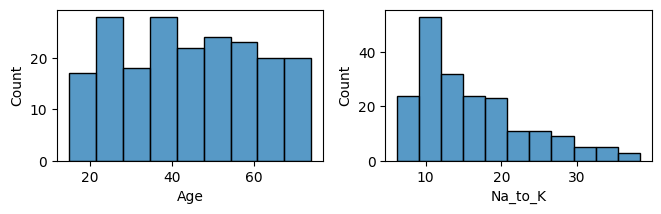

In [7]:
plt.figure(figsize = (10,6))
plot_number = 1

for col in col_for_countplot:
  if plot_number <=2:
    ax = plt.subplot(3,3, plot_number)
    plot = sns.histplot(data = df, x= col)
    plot_number += 1

plt.tight_layout()
plot

<Axes: xlabel='Drug', ylabel='Na_to_K'>

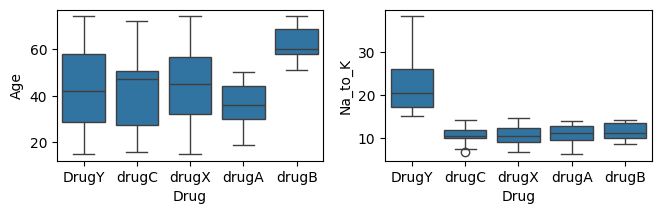

In [8]:
plt.figure(figsize = (10,6))
plot_number = 1
col_for_countplot = ['Age','Na_to_K']
for col in col_for_countplot:
  if plot_number <=2:
    ax = plt.subplot(3,3, plot_number)
    plot = sns.boxplot(data= df, y= col, x= df.Drug)
    plot_number += 1

plt.tight_layout()
plot

### 📊 **Categorical variables**: Sex, BP, Cholesterol, Drug


M    104
F     96
Name: Sex, dtype: int64
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


<Axes: xlabel='Drug', ylabel='count'>

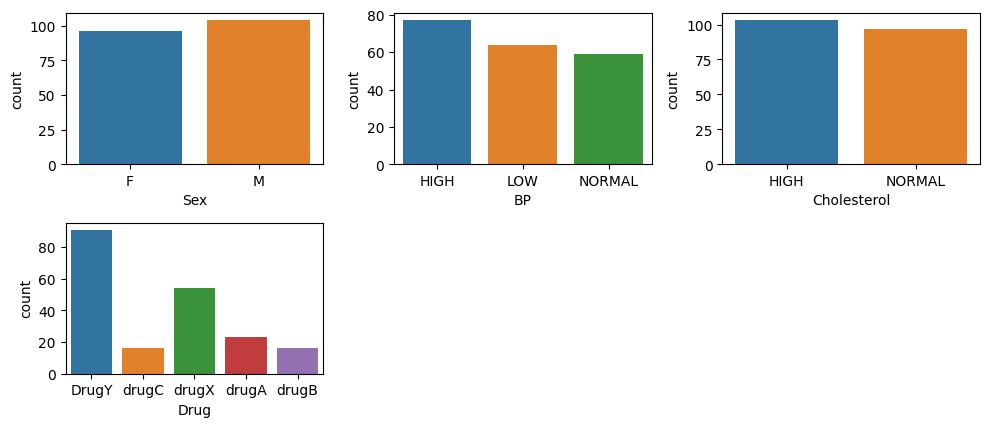

In [9]:
plt.figure(figsize = (10,6))
plot_number = 1
col_for_catplot = ['Sex', 'BP','Cholesterol', 'Drug']
for col in col_for_catplot:
  if plot_number <= 4:
    cat_of_col = df[col].value_counts()
    ax = plt.subplot(3,3, plot_number)
    plot = sns.countplot(data = df, x= col, hue = col)
    print(cat_of_col)
    plot_number += 1

plt.tight_layout()
plot

Check gender distribution based on the drug type.

Text(0, 0.5, 'Frequency')

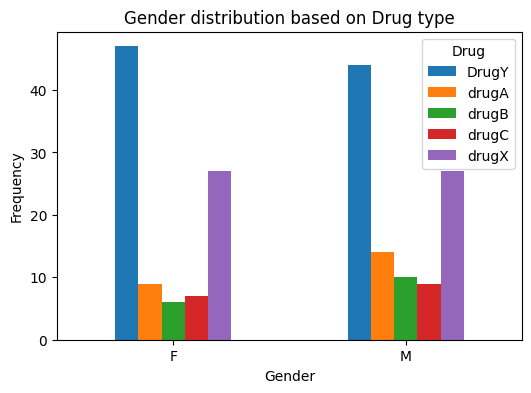

In [10]:
pd.crosstab(df.Sex,df.Drug).plot(kind="bar",figsize=(6,4))
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

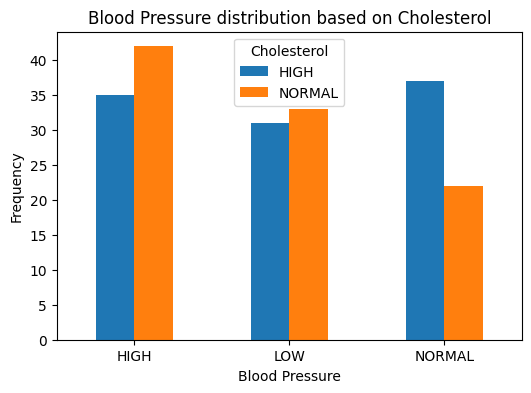

In [11]:
pd.crosstab(df.BP,df.Cholesterol).plot(kind="bar",figsize=(6,4))
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')

<Axes: xlabel='Age', ylabel='Na_to_K'>

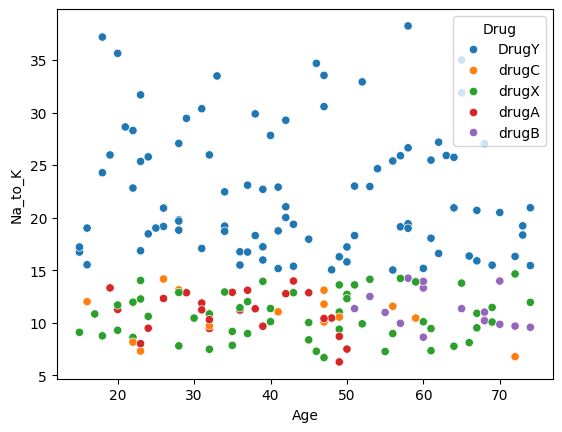

In [12]:
sns.scatterplot(x=df.Age, y=df.Na_to_K, hue =df.Drug)

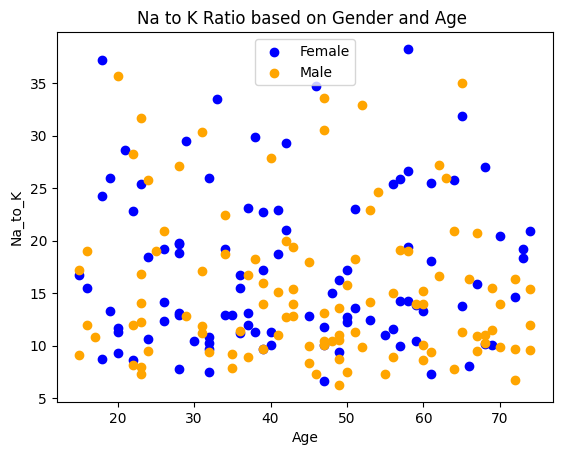

In [13]:
plt.scatter(x=df.Age[df.Sex=='F'], y=df.Na_to_K[df.Sex=='F'], c="Blue")
plt.scatter(x=df.Age[df.Sex=='M'], y=df.Na_to_K[df.Sex=='M'], c="Orange")
plt.title('Na to K Ratio based on Gender and Age ')
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
x = df.drop(columns = 'Drug', axis=1)
x = pd.get_dummies(x)
y = df.Drug
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
x.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0


In [15]:
def models(x_train, y_train):
  #logistic regression
  from sklearn.linear_model import LogisticRegression
  logis = LogisticRegression(random_state=0).fit(x_train,y_train)
  #decision tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0).fit(x_train,y_train)
  #random forest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(criterion = 'entropy', random_state=0).fit(x_train,y_train)
  #KNN
  from sklearn.neighbors import KNeighborsClassifier
  neigh = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
  #SVM
  from sklearn import svm
  svm_model = svm.SVC(kernel='linear').fit(x_train,y_train)
  # Naive Bayes
  from sklearn.naive_bayes import MultinomialNB
  nb_classifier = MultinomialNB()
  nb = nb_classifier.fit(x_train, y_train)

  print('[0]score of logistic regression model: ' , logis.score(x_train, y_train))
  print('[1]score of decision tree model: ' , tree.score(x_train, y_train))
  print('[2]score of random forest model: ' , forest.score(x_train, y_train))
  print('[3]score of KNN model: ' , neigh.score(x_train, y_train))
  print('[4]score of SVM model: ' , svm_model.score(x_train, y_train))
  print('[5]score of NB model: ' , nb.score(x_train, y_train))
  return logis, tree, forest, neigh, svm_model, nb

In [16]:
model = models(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0]score of logistic regression model:  0.9733333333333334
[1]score of decision tree model:  1.0
[2]score of random forest model:  1.0
[3]score of KNN model:  0.8266666666666667
[4]score of SVM model:  1.0
[5]score of NB model:  0.76


In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(6):
  print()
  print(f'model {i+1}')
  print(classification_report(y_test, model[i].predict(x_test)))
  print(f'accuracy score is {accuracy_score(y_test, model[i].predict(x_test)).round(2)}')


model 1
              precision    recall  f1-score   support

       DrugY       0.92      0.92      0.92        25
       drugA       0.80      0.80      0.80         5
       drugB       0.00      0.00      0.00         1
       drugC       1.00      0.67      0.80         3
       drugX       0.94      0.94      0.94        16

    accuracy                           0.88        50
   macro avg       0.73      0.66      0.69        50
weighted avg       0.90      0.88      0.89        50

accuracy score is 0.88

model 2
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        25
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         1
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
accuracy_log = accuracy_score(y_test, model[0].predict(x_test)).round(2)
accuracy_tree = accuracy_score(y_test, model[1].predict(x_test)).round(2)
accuracy_random = accuracy_score(y_test, model[2].predict(x_test)).round(2)
accuracy_knn = accuracy_score(y_test, model[3].predict(x_test)).round(2)
accuracy_svm = accuracy_score(y_test, model[4].predict(x_test)).round(2)
accuracy_nb = accuracy_score(y_test, model[5].predict(x_test)).round(2)
dic = {'model': ['logistic', 'decision tree', 'random forest', 'KNN', 'SVM', 'NB'], 'score': [accuracy_log,accuracy_tree,accuracy_random,accuracy_knn,accuracy_svm,accuracy_nb ]}
df = pd.DataFrame(data=dic)
df.set_index('model', inplace=True)
df


,score
model,
logistic,0.88
decision tree,1.00
random forest,1.00
KNN,0.72
SVM,0.98
NB,0.70


<Axes: title={'center': 'Accuracy Across Models'}, xlabel='accurarcy score', ylabel='model'>

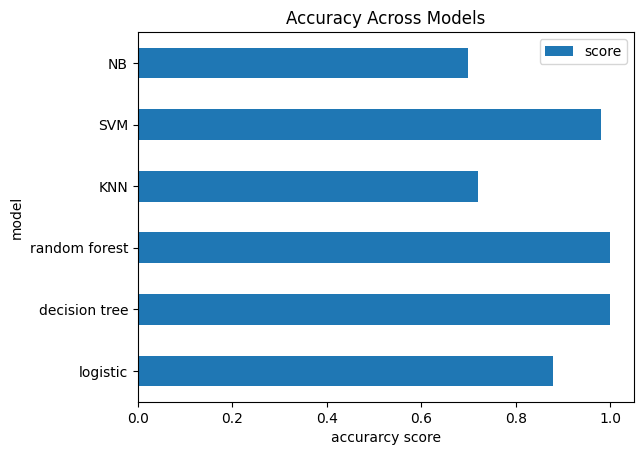

In [19]:
df.plot(kind = 'barh', title= 'Accuracy Across Models', xlabel = 'accurarcy score')